In [3]:
!pip install keras
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 17.6MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 26.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for keras-applications ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/dd/f2/5d/2689b5547f32c4e258c3b7ccbe7f1d0f2afbb84fb01e830792
Successfully built keras-applications
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
typing-extensions 3.7.4.1 has requirement typing>=3.7.4;

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

Using TensorFlow backend.


In [5]:
# Directory path
train_data_dir = 'data/Cracks/train'
test_data_dir = 'data/Cracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463, color_mode='grayscale')

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1839, color_mode='grayscale')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 463 images belonging to 2 classes.
Found 1839 images belonging to 2 classes.


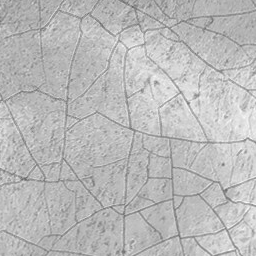

In [6]:
# Previewing an image
array_to_img(train_images[15])

In [7]:
train_images.shape

(1839, 256, 256, 1)

In [8]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

train data shape: (1839, 256, 256, 1) (1839, 2)
test data shape: (463, 256, 256, 1) (463, 2)


In [9]:
# Unrowing/reshaping
train_img = train_images.reshape(train_images.shape[0], -1)
print('train_img:', np.shape(train_img))

test_img = test_images.reshape(test_images.shape[0], -1)
print('test_img:', np.shape(test_img))

train_img: (1839, 65536)
test_img: (463, 65536)


In [10]:
# Looking at the labels
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [11]:
train_generator.class_indices

{'Dutch': 0, 'Flemish': 1}

In [13]:
# Transposing the labels
train_y = np.reshape(train_labels[:,0], (1839,1))
print('train labels final:', np.shape(train_y))

test_y = np.reshape(test_labels[:,0], (463,1))
print('test labels final:', np.shape(test_y))

train labels final: (1839, 1)
test labels final: (463, 1)


In [14]:
from keras import models
from keras import layers

In [19]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(65536,))) #2 hidden layers
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=5,
                    batch_size=100,
                    validation_split=0.3)

Train on 1287 samples, validate on 552 samples
Epoch 1/5
1287/1287 [==============================] - 2s 1ms/step - loss: 8.9437 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 2/5
1287/1287 [==============================] - 1s 439us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 3/5
1287/1287 [==============================] - 1s 431us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 4/5
1287/1287 [==============================] - 1s 432us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 5/5
1287/1287 [==============================] - 1s 436us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348


In [21]:
np.random.seed(123)
model1 = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(70, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(150, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(250, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

ValueError: Input 0 is incompatible with layer conv2d_3: expected ndim=4, found ndim=2

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_3 = model.fit(train_images,
                    train_y,
                    epochs=5,
                    batch_size=50,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/5
1297/1297 [==============================] - 133s 103ms/step - loss: 0.7820 - accuracy: 0.4965 - val_loss: 0.6893 - val_accuracy: 0.5727
Epoch 2/5
1297/1297 [==============================] - 134s 103ms/step - loss: 0.6865 - accuracy: 0.5559 - val_loss: 0.6751 - val_accuracy: 0.5727
Epoch 3/5
1297/1297 [==============================] - 133s 102ms/step - loss: 0.6688 - accuracy: 0.5559 - val_loss: 0.6672 - val_accuracy: 0.5727
Epoch 4/5
1297/1297 [==============================] - 133s 103ms/step - loss: 0.6643 - accuracy: 0.5659 - val_loss: 0.6906 - val_accuracy: 0.5566
Epoch 5/5
1297/1297 [==============================] - 132s 102ms/step - loss: 0.6893 - accuracy: 0.5389 - val_loss: 0.6850 - val_accuracy: 0.5727


In [14]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(70, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(150, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(250, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_3 = model.fit(train_images,
                    train_y,
                    epochs=10,
                    batch_size=100,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/10
1297/1297 [==============================] - 135s 104ms/step - loss: 0.7362 - accuracy: 0.4811 - val_loss: 0.6913 - val_accuracy: 0.5637
Epoch 2/10
1297/1297 [==============================] - 135s 104ms/step - loss: 0.6900 - accuracy: 0.5598 - val_loss: 0.6872 - val_accuracy: 0.5637
Epoch 3/10
1297/1297 [==============================] - 135s 104ms/step - loss: 0.6883 - accuracy: 0.5598 - val_loss: 0.6815 - val_accuracy: 0.5637
Epoch 4/10
1297/1297 [==============================] - 134s 103ms/step - loss: 0.6872 - accuracy: 0.5598 - val_loss: 0.6840 - val_accuracy: 0.5637
Epoch 5/10
1297/1297 [==============================] - 135s 104ms/step - loss: 0.6876 - accuracy: 0.5598 - val_loss: 0.6818 - val_accuracy: 0.5637
Epoch 6/10
1297/1297 [==============================] - 134s 104ms/step - loss: 0.6865 - accuracy: 0.5598 - val_loss: 0.6857 - val_accuracy: 0.5637
Epoch 7/10
1297/1297 [==============================] - 135s 104m

In [37]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(250, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(250, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_4 = model.fit(train_images,
                    train_y,
                    epochs=10,
                    batch_size=100,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/10
1297/1297 [==============================] - 231s 178ms/step - loss: 0.8093 - accuracy: 0.5544 - val_loss: 0.6850 - val_accuracy: 0.5566
Epoch 2/10
1297/1297 [==============================] - 229s 176ms/step - loss: 0.6949 - accuracy: 0.5628 - val_loss: 0.6839 - val_accuracy: 0.5566
Epoch 3/10
1297/1297 [==============================] - 228s 176ms/step - loss: 0.6953 - accuracy: 0.5305 - val_loss: 0.6844 - val_accuracy: 0.5566
Epoch 4/10
1297/1297 [==============================] - 228s 176ms/step - loss: 0.6849 - accuracy: 0.5628 - val_loss: 0.6793 - val_accuracy: 0.5566
Epoch 5/10
1297/1297 [==============================] - 229s 177ms/step - loss: 0.6785 - accuracy: 0.5628 - val_loss: 0.6784 - val_accuracy: 0.5566
Epoch 6/10
1297/1297 [==============================] - 228s 175ms/step - loss: 0.6769 - accuracy: 0.5628 - val_loss: 0.6636 - val_accuracy: 0.5566
Epoch 7/10
 100/1297 [=>............................] - ETA: 3:04

In [54]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=3, kernel_size=128, strides=(3, 3), activation='relu',
                        input_shape=(256, 256,  1)))

# model.add(layers.Conv2D(filters=3, kernel_size=128, strides=(3, 3), activation='relu'))

# model.add(layers.Conv2D(filters=3, kernel_size=64, strides=(3, 3), activation='relu'))

# model.add(layers.Conv2D(filters=3, kernel_size=32, strides=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(filters=3, kernel_size=1, strides=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_5 = model.fit(train_images,
                    train_y,
                    epochs=10,
                    batch_size=100,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/10
1297/1297 [==============================] - 241s 186ms/step - loss: 0.9748 - accuracy: 0.4796 - val_loss: 0.6925 - val_accuracy: 0.5530
Epoch 2/10
1297/1297 [==============================] - 239s 184ms/step - loss: 0.6914 - accuracy: 0.5644 - val_loss: 0.6905 - val_accuracy: 0.5530
Epoch 3/10
1297/1297 [==============================] - 239s 185ms/step - loss: 0.6888 - accuracy: 0.5644 - val_loss: 0.6886 - val_accuracy: 0.5530
Epoch 4/10
1297/1297 [==============================] - 240s 185ms/step - loss: 0.6870 - accuracy: 0.5644 - val_loss: 0.6876 - val_accuracy: 0.5530
Epoch 5/10


KeyboardInterrupt: 

In [72]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=10, kernel_size=10, strides=(3, 3), activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Conv2D(filters=20, kernel_size=5, strides=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Conv2D(filters=40, kernel_size=3, strides=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Conv2D(filters=80, kernel_size=3, strides=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Conv2D(filters=160, kernel_size=1, strides=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_6 = model.fit(train_images,
                    train_y,
                    epochs=50,
                    batch_size=100,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/50
1297/1297 [==============================] - 13s 10ms/step - loss: 0.6833 - accuracy: 0.5659 - val_loss: 0.6885 - val_accuracy: 0.5530
Epoch 2/50
1297/1297 [==============================] - 12s 9ms/step - loss: 0.6822 - accuracy: 0.5652 - val_loss: 0.7032 - val_accuracy: 0.5530
Epoch 3/50
1297/1297 [==============================] - 12s 9ms/step - loss: 0.6802 - accuracy: 0.5644 - val_loss: 0.6854 - val_accuracy: 0.5530
Epoch 4/50
1297/1297 [==============================] - 13s 10ms/step - loss: 0.6641 - accuracy: 0.5644 - val_loss: 0.6800 - val_accuracy: 0.5530
Epoch 5/50
1297/1297 [==============================] - 12s 9ms/step - loss: 0.6601 - accuracy: 0.5590 - val_loss: 0.6719 - val_accuracy: 0.5314
Epoch 6/50
1297/1297 [==============================] - 12s 9ms/step - loss: 0.6547 - accuracy: 0.5520 - val_loss: 0.6764 - val_accuracy: 0.5278
Epoch 7/50
1297/1297 [==============================] - 12s 9ms/step - loss: 0.64

In [14]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.AveragePooling2D((10, 10)))

# model.add(layers.Conv2D(filters=20, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((6, 6)))

# model.add(layers.Conv2D(filters=40, kernel_size=3, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=80, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=160, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_7 = model.fit(train_images,
                    train_y,
                    epochs=200,
                    batch_size=1000,
                    validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 1297 samples, validate on 557 samples
Epoch 1/200
1297/1297 [==============================] - 23s 18ms/step - loss: 1.2859 - accuracy: 0.4603 - val_loss: 0.7118 - val_accuracy: 0.4057
Epoch 2/200
1297/1297 [==============================] - 23s 17ms/step - loss: 0.7160 - accuracy: 0.4534 - val_loss: 1.0765 - val_accuracy: 0.5907
Epoch 3/200
1297/1297 [==============================] - 23s 17ms/step - loss: 1.0607 - accuracy: 0.5359 - val_loss: 0.8590 - val_accuracy: 0.4093
Epoch 4/200
1297/1297 [==============================] - 23s 18ms/step - loss: 0.7960 - accuracy: 0.4518 - val_loss: 0.6941 - val_accuracy: 0.4811
Epoch 5/200
1297/1297 [==============================] - 23s 17ms/step - loss: 0.6934 - accuracy: 0.4904 - val_loss: 0.6943 - val_accuracy: 0.4758
Epoch 6/200
1297/1297 [==============================] - 23s 17ms/step - loss: 0.6921 - accuracy: 0.4927 - val_loss: 0.6756 - val_accuracy: 0.5907
Epoch 7/200
1297/1297 [

In [10]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((10, 10)))

# model.add(layers.Conv2D(filters=20, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((4, 4)))

# model.add(layers.Conv2D(filters=40, kernel_size=3, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=80, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=160, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_8 = model.fit(train_images,
                    train_y,
                    epochs=500,
                    batch_size=16,
                    validation_split=0.3)

Train on 1297 samples, validate on 557 samples
Epoch 1/500
1297/1297 [==============================] - 5s 4ms/step - loss: 0.0542 - acc: 0.9800 - val_loss: 4.8865 - val_acc: 0.5673
Epoch 2/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0526 - acc: 0.9830 - val_loss: 3.8052 - val_acc: 0.6122
Epoch 3/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0112 - acc: 0.9931 - val_loss: 4.2008 - val_acc: 0.5978
Epoch 4/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0153 - acc: 0.9946 - val_loss: 4.0361 - val_acc: 0.6302
Epoch 5/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0066 - acc: 0.9977 - val_loss: 4.1366 - val_acc: 0.6230
Epoch 6/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0841 - acc: 0.9738 - val_loss: 4.3061 - val_acc: 0.5763
Epoch 7/500
1297/1297 [==============================] - 3s 2ms/step - loss: 0.1218 - acc: 0.9653 - val_loss: 3.3528 - val_acc: 0.6104
Epoch 8/

KeyboardInterrupt: 

In [22]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((10, 10)))

# model.add(layers.Conv2D(filters=10, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.MaxPooling2D((4, 4)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
# from keras.optimizers import SGD
# opt = SGD(lr=0.00001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_9 = model.fit(train_images,
                    train_y,
                    epochs=1200,
                    batch_size=32,
                    validation_split=0.3)

Train on 1287 samples, validate on 552 samples
Epoch 1/1200
1287/1287 [==============================] - 4s 3ms/step - loss: 0.8795 - acc: 0.5338 - val_loss: 0.7437 - val_acc: 0.5525
Epoch 2/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.7255 - acc: 0.5548 - val_loss: 0.7317 - val_acc: 0.5489
Epoch 3/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.7010 - acc: 0.5726 - val_loss: 0.7255 - val_acc: 0.5217
Epoch 4/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6928 - acc: 0.5789 - val_loss: 0.7298 - val_acc: 0.5362
Epoch 5/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6868 - acc: 0.5781 - val_loss: 0.7219 - val_acc: 0.5399
Epoch 6/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6751 - acc: 0.5952 - val_loss: 0.7111 - val_acc: 0.5616
Epoch 7/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6693 - acc: 0.5944 - val_loss: 0.7115 - val_acc: 0.5489
E